In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager,rc 
import folium
import json
import seaborn as sns
#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

# 1. 전체 충전소

## 전처리

In [2]:
a=pd.read_csv('210818 환경부 크롤링.csv')
a.head()

구명  시설분류   주차장명  사용상태 충전기타입                        수집시간    동
0  강남구  관광시설  SETEC  사용가능    급속  2021-08-18 10:05:53.430625  대치동
1  강남구  관광시설  SETEC   사용중    급속  2021-08-18 11:05:22.839749  대치동
2  강남구  관광시설  SETEC  사용가능    급속  2021-08-18 12:05:22.391825  대치동
3  강남구  관광시설  SETEC  사용가능    급속  2021-08-18 13:05:27.475507  대치동
4  강남구  관광시설  SETEC   사용중    급속  2021-08-18 14:43:42.742611  대치동

In [3]:
# 수집 시간 밑에 분~부터 필요없는 것 자르기
a['수집시간']=a['수집시간'].astype(str)
istime=[]
for i in a['수집시간']:
    i=i.split('.')[0]
    i=i.split(':')[0]+'시'
    istime.append(i)
a['수집시간']=istime
a['수집시간']

0       2021-08-18 10시
1       2021-08-18 11시
2       2021-08-18 12시
3       2021-08-18 13시
4       2021-08-18 14시
             ...      
1840    2021-08-18 14시
1841    2021-08-18 16시
1842    2021-08-18 18시
1843    2021-08-18 21시
1844    2021-08-18 22시
Name: 수집시간, Length: 1845, dtype: object

In [4]:
a=a.applymap(lambda x: str(x).strip())

## EDA

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구명      1845 non-null   object
 1   시설분류    1845 non-null   object
 2   주차장명    1845 non-null   object
 3   사용상태    1845 non-null   object
 4   충전기타입   1845 non-null   object
 5   수집시간    1845 non-null   object
dtypes: object(6)
memory usage: 86.6+ KB


In [5]:
a.describe()

구명  시설분류     주차장명  사용상태 충전기타입            수집시간
count   1845  1845     1845  1845  1845            1845
unique    25    10      204     3     1              10
top     영등포구  주차시설  이마트 은평점  사용가능    급속  2021-08-18 11시
freq     171   828       18  1450  1845             205

In [6]:
a.isnull().sum()

구명       0
시설분류     0
주차장명     0
사용상태     0
충전기타입    0
수집시간     0
dtype: int64

In [7]:
a.shape

(1845, 6)

In [3]:
a['사용상태'].value_counts()

사용가능    1450
사용중      242
사용불가     153
Name: 사용상태, dtype: int64

In [4]:
242/10

24.2

#### 전체 충전소에 대한 분석은 8월13일 분석 내용과 동일하기 떄문에 여기서는 더 진행하지 않음 !!!

# 2. 사용중인 충전소

## 전처리/EDA

In [3]:
total_use=a[a['사용상태']=='사용중']
total_use=total_use.reset_index(drop=True)
total_use

구명    시설분류                주차장명 사용상태 충전기타입                        수집시간  \
0    강남구    관광시설               SETEC  사용중    급속  2021-08-18 11:05:22.839749   
1    강남구    관광시설               SETEC  사용중    급속  2021-08-18 14:43:42.742611   
2    강남구    공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 10:05:46.161942   
3    강남구    공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 11:05:15.458146   
4    강남구    공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 12:05:14.980395   
..   ...     ...                 ...  ...   ...                         ...   
237  종로구  교육문화시설        한국예술종합학교(종로)  사용중    급속  2021-08-18 12:14:10.769927   
238   중구    공공시설              예금보험공사  사용중    급속  2021-08-18 10:15:22.520439   
239  중랑구    주차시설        용마폭포공원 공영주차장  사용중    급속  2021-08-18 21:00:13.818043   
240  중랑구    상업시설            홈플러스 상봉점  사용중    급속  2021-08-18 18:55:17.915478   
241  중랑구    상업시설            홈플러스 신내점  사용중    급속  2021-08-18 18:55:17.915478   

       동  
0    대치동  
1    대치동  
2    삼성동  
3    삼성동  
4    삼성동  
..   ...  
237  와룡동  
238   다동  
239  면목동  
240  상봉동  
241  신내동  

[242 rows x 7 columns]

In [9]:
total_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구명      242 non-null    object
 1   시설분류    242 non-null    object
 2   주차장명    242 non-null    object
 3   사용상태    242 non-null    object
 4   충전기타입   242 non-null    object
 5   수집시간    242 non-null    object
dtypes: object(6)
memory usage: 11.5+ KB


In [10]:
total_use.describe()

구명  시설분류     주차장명 사용상태 충전기타입            수집시간
count   242   242      242  242   242             242
unique   25     8       99    1     1              10
top     강서구  주차시설  이마트 양재점  사용중    급속  2021-08-18 12시
freq     38   110        9  242   242              32

In [11]:
total_use.isnull().sum()

구명       0
시설분류     0
주차장명     0
사용상태     0
충전기타입    0
수집시간     0
dtype: int64

## 구 별 분석 & 시각화

In [12]:
#사용중인 충전소 구별 횟수
total_use['구명'].value_counts()

강서구     38
서초구     26
영등포구    22
강남구     19
구로구     16
양천구     15
도봉구     14
마포구     13
동작구     11
송파구      9
종로구      8
관악구      6
강동구      6
노원구      6
성북구      5
광진구      4
강북구      4
용산구      3
중랑구      3
은평구      3
서대문구     3
동대문구     3
성동구      2
금천구      2
중구       1
Name: 구명, dtype: int64

In [13]:
print(total_use['구명'].value_counts().mean()) #평균
print(total_use['구명'].value_counts().sum()) #합계
print(total_use['구명'].value_counts().max()) #최대값
print(total_use['구명'].value_counts().min()) #최소값
print(total_use['구명'].value_counts().std()) #표준편차
print(total_use['구명'].value_counts().count()) #개수

9.68
242
38
1
9.021825388098206
25


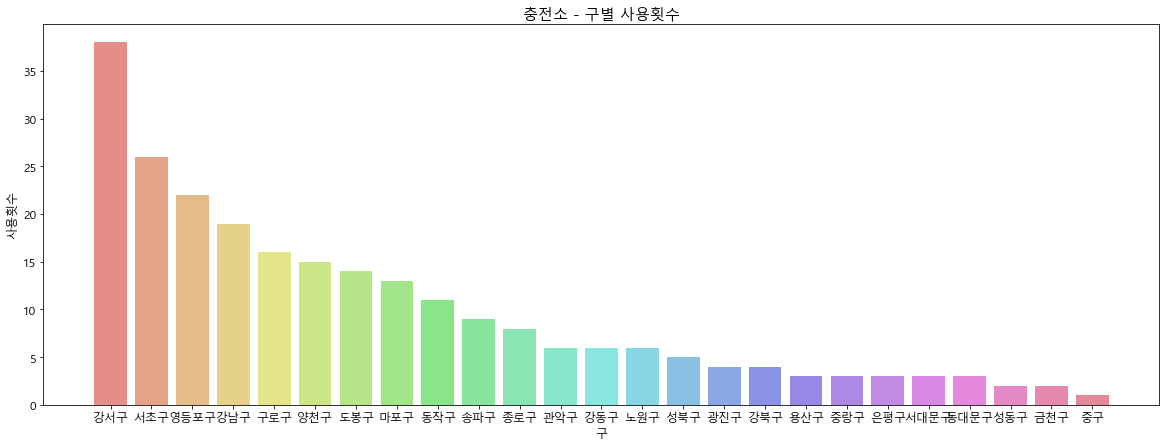

In [14]:
#사용중인 충전소의 구별 막대그래프 (전체와 순위가 다름을 알 수 있음)
data=total_use['구명'].value_counts()
labels= total_use['구명'].value_counts().index
plt.figure(figsize=(20,7))
colors=sns.color_palette('hls',len(data))
plt.title('충전소 - 구별 사용횟수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('사용횟수',fontsize=12)
plt.show()

#### 비교

In [15]:
#환경부에서 운영하는 충전소의 구별 개수 (비교위해 만듦)
gu=a['구명'].value_counts()
gu=gu.map(lambda x: x//9) #이날은 9번 수집했기때문에 9로 나눔
gu

영등포구    19
강남구     19
마포구     15
양천구     12
강서구     12
서초구     12
성동구     10
송파구     10
도봉구      8
은평구      8
노원구      8
관악구      7
중랑구      7
종로구      6
금천구      6
구로구      6
강북구      6
강동구      6
중구       5
동대문구     5
용산구      5
동작구      4
서대문구     4
성북구      3
광진구      2
Name: 구명, dtype: int64

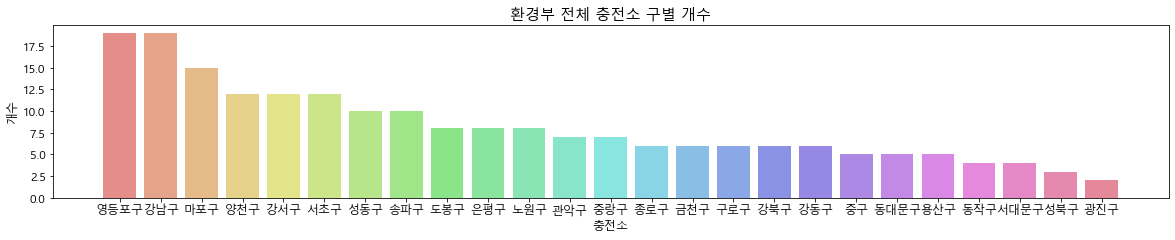

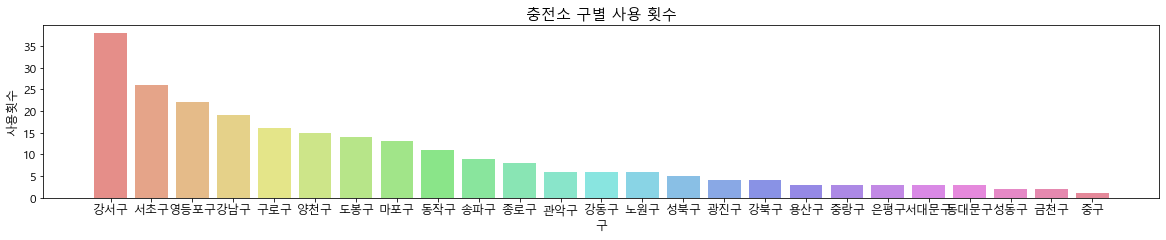

In [16]:
#전체 충전소의 구별 분포 막대그래프
data=gu
labels=gu.index
plt.figure(figsize=(20,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data))
plt.title('환경부 전체 충전소 구별 개수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('충전소',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

#사용중인 충전소의 구별 막대그래프 (전체와 순위가 다름을 알 수 있음)
data=total_use['구명'].value_counts()
labels= total_use['구명'].value_counts().index
plt.figure(figsize=(20,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data))
plt.title('충전소 구별 사용 횟수',fontsize=15)
plt.bar(labels,data,color=colors,alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('구',fontsize=12)
plt.ylabel('사용횟수',fontsize=12)
plt.show()

### 구별 구체적인 주차장 목록 알아보기

In [17]:
#사용중인 충전소 구별 주차장 목록
seoul_list=['강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구',\
           '마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']
for i in seoul_list:
    print(i)
    print(total_use.loc[total_use['구명']==i])
    print('-'*50)

강남구
     구명  시설분류                주차장명 사용상태 충전기타입            수집시간
0   강남구  관광시설               SETEC  사용중    급속  2021-08-18 11시
1   강남구  관광시설               SETEC  사용중    급속  2021-08-18 14시
2   강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 10시
3   강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 11시
4   강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 12시
5   강남구  주차시설    강남치매지원센터 공영노외주차장  사용중    급속  2021-08-18 10시
6   강남구  주차시설    강남치매지원센터 공영노외주차장  사용중    급속  2021-08-18 12시
7   강남구  주차시설         개포동공원 공영주차장  사용중    급속  2021-08-18 13시
8   강남구  주차시설         개포동공원 공영주차장  사용중    급속  2021-08-18 20시
9   강남구  주차시설        논현로22길 공영주차장  사용중    급속  2021-08-18 13시
10  강남구  주차시설        논현로22길 공영주차장  사용중    급속  2021-08-18 16시
11  강남구  주차시설        논현초교 공영노외주차장  사용중    급속  2021-08-18 10시
12  강남구  주차시설           수서역 공영주차장  사용중    급속  2021-08-18 10시
13  강남구  주차시설     압구정로29길 공영노상주차장  사용중    급속  2021-08-18 10시
14  강남구  주차시설     압구정로29길 공영노상주차장  사용중    급속  2021-08-18 11시
15  강남구  주차시설     압구

## 시설별 분석 & 시각화

In [18]:
# 사용중인 충전소의 시설
total_use['시설분류'].value_counts()

주차시설      110
상업시설       61
공공시설       38
기타시설       14
관광시설       11
근린생활시설      5
교육문화시설      2
휴게시설        1
Name: 시설분류, dtype: int64

In [19]:
print(total_use['시설분류'].value_counts().mean()) #평균
print(total_use['시설분류'].value_counts().sum()) #합계
print(total_use['시설분류'].value_counts().max()) #최대값
print(total_use['시설분류'].value_counts().min()) #최소값
print(total_use['시설분류'].value_counts().std()) #표준편차
print(total_use['시설분류'].value_counts().count()) #개수

30.25
242
110
1
38.343373426372985
8


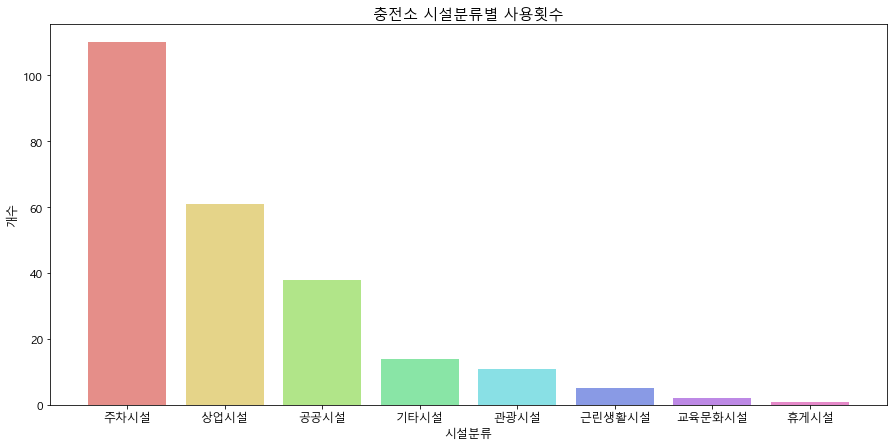

In [20]:
#사용중인 충전소의 시설 개수 막대그래프 
data=total_use['시설분류'].value_counts()
labels= total_use['시설분류'].value_counts().index
plt.figure(figsize=(15,7))
colors=sns.color_palette('hls',len(data)) #
plt.title('충전소 시설분류별 사용횟수',fontsize=15)
plt.bar(labels,data,color=colors, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('시설분류',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

#### 비교

In [21]:
#전체 충전소의 시설 개수 파악
siseol=a['시설분류'].value_counts()
siseol=siseol.map(lambda x: x//9) 
siseol

주차시설      92
공공시설      42
상업시설      42
관광시설       9
기타시설       7
근린생활시설     5
차량정비시설     3
교육문화시설     2
공동주택시설     2
휴게시설       1
Name: 시설분류, dtype: int64

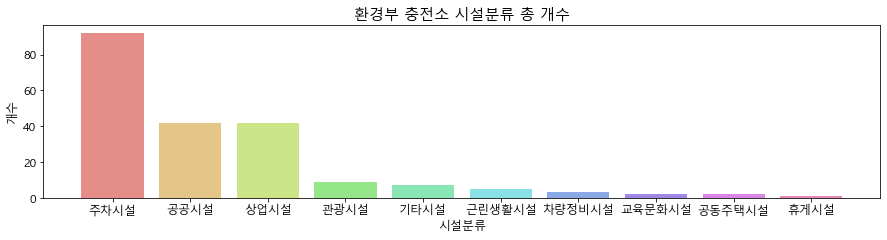

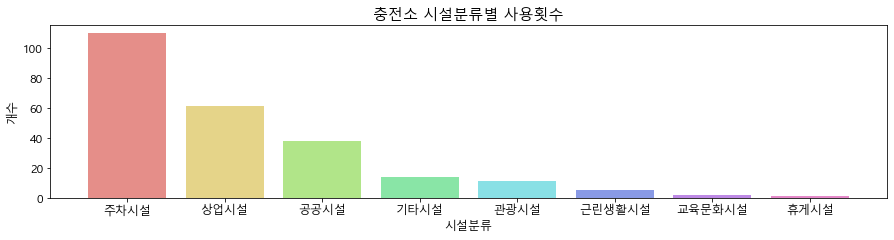

In [22]:
#전체 충전소의 시설 개수 막대그래프
data=siseol
labels= siseol.index
plt.figure(figsize=(15,7))
plt.subplot(211)
colors=sns.color_palette('hls',len(data)) 
plt.title('환경부 충전소 시설분류 총 개수',fontsize=15)
plt.bar(labels,data,color=colors, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('시설분류',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

#사용중인 충전소의 시설 개수 막대그래프 => 살짝 다름
data=total_use['시설분류'].value_counts()
labels= total_use['시설분류'].value_counts().index
plt.figure(figsize=(15,7))
plt.subplot(212)
colors=sns.color_palette('hls',len(data)) #
plt.title('충전소 시설분류별 사용횟수',fontsize=15)
plt.bar(labels,data,color=colors, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('시설분류',fontsize=12)
plt.ylabel('개수',fontsize=12)
plt.show()

### 시설별 구체적인 주차장 목록 알아보기

In [23]:
#사용중인 충전소 시설별 주차장명 목록
type_list=['공공시설','주차시설','휴게시설','관광시설','상업시설','차량정비시설','공동주택시설','근린생활시설','교육문화시설','기타시설']
for i in type_list:
    print(i)
    print(total_use.loc[total_use['시설분류']==i])
    print('-'*50)

공공시설
       구명  시설분류                주차장명 사용상태 충전기타입            수집시간
2     강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 10시
3     강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 11시
4     강남구  공공시설  강남구청 삼성로 별관 부설 주차장  사용중    급속  2021-08-18 12시
16    강남구  공공시설           일원2동 주민센터  사용중    급속  2021-08-18 12시
17    강남구  공공시설           일원2동 주민센터  사용중    급속  2021-08-18 13시
18    강남구  공공시설           일원2동 주민센터  사용중    급속  2021-08-18 20시
19    강동구  공공시설                강동구청  사용중    급속  2021-08-18 12시
20    강동구  공공시설                강동구청  사용중    급속  2021-08-18 20시
30    강서구  공공시설             가양레포츠센터  사용중    급속  2021-08-18 20시
31    강서구  공공시설         강서구민올림픽체육센터  사용중    급속  2021-08-18 16시
43    강서구  공공시설             마곡레포츠센터  사용중    급속  2021-08-18 11시
44    강서구  공공시설             마곡레포츠센터  사용중    급속  2021-08-18 12시
45    강서구  공공시설             마곡레포츠센터  사용중    급속  2021-08-18 20시
46    강서구  공공시설             마곡레포츠센터  사용중    급속  2021-08-18 21시
73    광진구  공공시설            도봉기적의도서관  사용중    급속  20

## 시간대별 분석 & 시각화

In [24]:
total_use['수집시간'].value_counts()

2021-08-18 12시    32
2021-08-18 16시    31
2021-08-18 13시    29
2021-08-18 10시    28
2021-08-18 18시    27
2021-08-18 11시    27
2021-08-18 14시    26
2021-08-18 20시    22
2021-08-18 21시    11
2021-08-18 22시     9
Name: 수집시간, dtype: int64

In [25]:
print(total_use['수집시간'].value_counts().mean()) #평균
print(total_use['수집시간'].value_counts().sum()) #합계
print(total_use['수집시간'].value_counts().max()) #최대값
print(total_use['수집시간'].value_counts().min()) #최소값
print(total_use['수집시간'].value_counts().std()) #표준편차
print(total_use['수집시간'].value_counts().count()) #개수

24.2
242
32
9
7.9833159359587755
10


In [26]:
#시간대별 그래프 그리기 위해 시간 리스트 따로만듦
ex=list(total_use['수집시간'].value_counts().index)
ex=[x.split()[1] for x in ex]
timelist=[]
for i in ex:
    i=i.split('시')[0]
    if i!='00':
        timelist.append(i)
timelist=[int(x) for x in timelist]
timelist.sort()
timelist=["0"+str(x)+"시" if x==8 or x==9 else str(x)+"시" for x in timelist]
timelist

['10시', '11시', '12시', '13시', '14시', '16시', '18시', '20시', '21시', '22시']

In [27]:
#시간 따라 그래프 그리기위해 value_counts도 다시 정렬
temp=[]
for i in timelist:
    for j in list(total_use['수집시간'].value_counts().index):
        if j.split()[1]== i:
            temp.append(total_use['수집시간'].value_counts()[j])
temp

[28, 27, 32, 29, 26, 31, 27, 22, 11, 9]

In [28]:
# 값들이 알맞게 들어갔는지 확인 (눈으로 대충 비교) ->일치
total_use['수집시간'].value_counts()

2021-08-18 12시    32
2021-08-18 16시    31
2021-08-18 13시    29
2021-08-18 10시    28
2021-08-18 18시    27
2021-08-18 11시    27
2021-08-18 14시    26
2021-08-18 20시    22
2021-08-18 21시    11
2021-08-18 22시     9
Name: 수집시간, dtype: int64

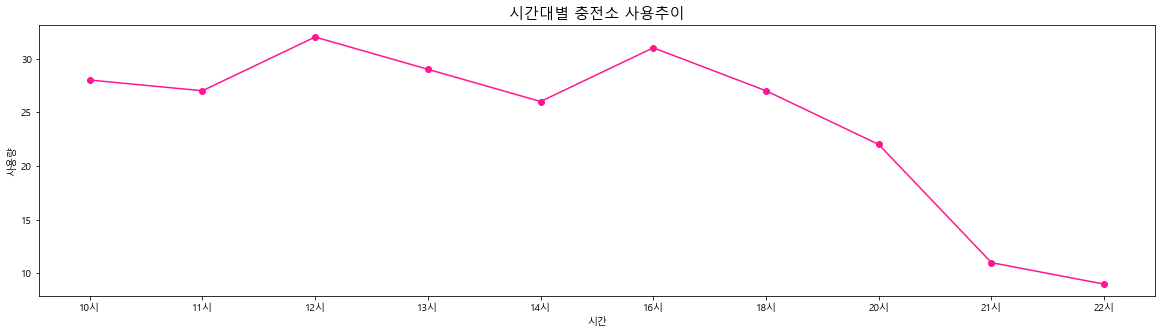

In [29]:
#사용중인 충전소 시간대별 추이 그래프 (시간순서대로)
data=temp
labels=timelist
plt.figure(figsize=(20,5))
plt.title('시간대별 충전소 사용추이',fontsize=15)
plt.plot(labels,data,'deeppink',marker='o')
plt.xlabel('시간')
plt.ylabel('사용량')
plt.show()

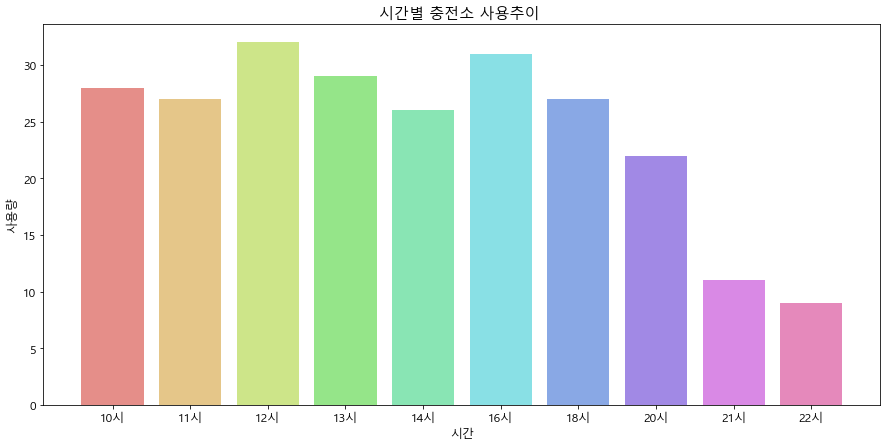

In [30]:
#사용중인 충전소의 시간대별 막대그래프 (시간순서대로)
data=temp
labels= timelist
plt.figure(figsize=(15,7))
colors=sns.color_palette('hls',len(data)) #
plt.title('시간별 충전소 사용추이 ',fontsize=15)
plt.bar(labels,data,color=colors, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('시간',fontsize=12)
plt.ylabel('사용량',fontsize=12)
plt.show()

## folium

### folium도 마찬가지로 전체 환경부 충전소의 개수는 13일과 동일함으로 18일에 사용중인 충전소만 folium 한다

In [31]:
#json 불러오기
geo_path='C:/Users/hrim1/Downloads/서울시_법정경계(시군구).geojson'
geo_str=json.load(open(geo_path,encoding='utf-8'))

In [32]:
test=pd.DataFrame(total_use['구명'].value_counts())
test

구명
강서구   38
서초구   26
영등포구  22
강남구   19
구로구   16
양천구   15
도봉구   14
마포구   13
동작구   11
송파구    9
종로구    8
관악구    6
강동구    6
노원구    6
성북구    5
광진구    4
강북구    4
용산구    3
중랑구    3
은평구    3
서대문구   3
동대문구   3
성동구    2
금천구    2
중구     1

In [33]:
# 툴팁에 넣을 리스트만들기
test_index=list(test.index)
memo2=[]
for i in test_index:
    memo2.append(str(i)+":"+str(test.loc[i]['구명'])+"회")
memo2

['강서구:38회',
 '서초구:26회',
 '영등포구:22회',
 '강남구:19회',
 '구로구:16회',
 '양천구:15회',
 '도봉구:14회',
 '마포구:13회',
 '동작구:11회',
 '송파구:9회',
 '종로구:8회',
 '관악구:6회',
 '강동구:6회',
 '노원구:6회',
 '성북구:5회',
 '광진구:4회',
 '강북구:4회',
 '용산구:3회',
 '중랑구:3회',
 '은평구:3회',
 '서대문구:3회',
 '동대문구:3회',
 '성동구:2회',
 '금천구:2회',
 '중구:1회']

In [34]:
#툴팁에 들어갈 내용 json파일에 추가하기
for i in range(0,len(seoul_list)):
    for j in range(0,len(memo2)):
        geo_str['features'][i]['properties']['memo2'] = geo_str['features'][i]['properties']['SIG_KOR_NM']+":"+'사용중인 충전소 없음'

In [35]:
#툴팁에 들어갈 내용 json파일에 추가하기
for i in range(0,len(memo2)):
    for j in range(0,len(memo2)):
        if geo_str['features'][i]['properties']['SIG_KOR_NM'] == memo2[j].split(':')[0]:
            geo_str['features'][i]['properties']['memo2'] = memo2[j]

In [36]:
#사용중인 충전소 folium
m1=folium.Map(location=[ 37.5665,126.9780 ],tiles='cartodbpositron',zoom_start=11)
choropleth=folium.Choropleth(
    geo_data=geo_str,
    data=test['구명'],
    columns=[test.index, test['구명']],
    fill_color='YlGn',
    fill_opacity=0.6,
    line_opacity=0.5,
    key_on='properties.SIG_KOR_NM',
    legend_name='사용중인 충전소 개수',
    highlight=True,
).add_to(m1
        )
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(
        ['memo2'],
        labels=False,
        style=('background-color: grey; color: white;')
        )
)

folium.LayerControl().add_to(m1)
m1

In [37]:
m1.save('210818 구별 사용중인 충전소 개수.html')

In [5]:
test=pd.DataFrame(columns=['gu','개수'])
test['gu']=list(total_use['구명'].value_counts().index.sort_values())
ge=[]
for i in list(total_use['구명'].value_counts().index.sort_values()):
    ge.append(total_use['구명'].value_counts()[i])
test['개수']=ge
test
test.to_csv('210818',index=False)

### 동별 추가

In [6]:
dong=pd.DataFrame({"동":total_use['동'].value_counts().index,"개수":total_use['동'].value_counts().values})
dong

동  개수
0    양재동  11
1    가양동  10
2    신길동  10
3     목동  10
4    동작동   9
..   ...  ..
69   삼전동   1
70   원지동   1
71   도봉동   1
72   신월동   1
73  영등포동   1

[74 rows x 2 columns]

In [7]:
df=pd.read_csv('C:/Users/hrim1/0.hrim/0.final/data/0포함 동별 충전소개수.csv')
df=df[['동']]
df['개수']=0
df=df.applymap(lambda x: str(x).strip())
df

동 개수
0     가락동  0
1    가리봉동  0
2     가산동  0
3     가양동  0
4     가회동  0
..    ... ..
462   훈정동  0
463   휘경동  0
464   흑석동  0
465   흥인동  0
466    항동  0

[467 rows x 2 columns]

In [8]:
new=pd.merge(df,dong,on='동',how='outer')
new=new[['동','개수_y']]
new.columns=(['동','개수'])
new=new.fillna(0)
new['개수']=new['개수'].astype(int)
new

동  개수
0     가락동   0
1    가리봉동   1
2     가산동   0
3     가양동  10
4     가회동   0
..    ...  ..
462   훈정동   1
463   휘경동   0
464   흑석동   2
465   흥인동   0
466    항동   0

[467 rows x 2 columns]

In [39]:
#개수가 잘 들어갔는지 확인
count=0
for i in new['개수']: 
    flag = False    # 같은 동이 없는 상태 
    for j in dong['개수']: 
        if i == j: 
            flag = True   # 같은 동이 있을때 
            count+=1
            print(i ,'=', j  )
            break
#     if flag==False:
#         print("_______")
#         print(j)
print(count)

1 = 1
10 = 10
2 = 2
7 = 7
3 = 3
1 = 1
3 = 3
2 = 2
2 = 2
1 = 1
3 = 3
1 = 1
6 = 6
1 = 1
2 = 2
1 = 1
9 = 9
3 = 3
4 = 4
4 = 4
1 = 1
10 = 10
3 = 3
1 = 1
9 = 9
3 = 3
1 = 1
1 = 1
9 = 9
2 = 2
3 = 3
4 = 4
1 = 1
5 = 5
1 = 1
2 = 2
1 = 1
2 = 2
2 = 2
2 = 2
2 = 2
2 = 2
1 = 1
2 = 2
2 = 2
10 = 10
1 = 1
1 = 1
3 = 3
1 = 1
4 = 4
3 = 3
4 = 4
3 = 3
11 = 11
1 = 1
1 = 1
9 = 9
2 = 2
9 = 9
3 = 3
1 = 1
1 = 1
2 = 2
5 = 5
3 = 3
2 = 2
9 = 9
4 = 4
4 = 4
1 = 1
3 = 3
1 = 1
2 = 2
74


In [9]:
new.to_csv('0818 동별 사용량.csv',index=False)